<a href="https://colab.research.google.com/github/AiluriNarmadaReddy/veichelecount/blob/main/veichle_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/AiluriNarmadaReddy/veichelecount.git

Cloning into 'veichelecount'...
remote: Enumerating objects: 7295, done.
remote: Total 7295 (delta 0), reused 0 (delta 0), pack-reused 7295
Receiving objects: 100% (7295/7295), 98.97 MiB | 24.36 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
! pip install ultralytics
! pip install wandb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/710.2 kB ? eta -:--:--
     ━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/710.2 kB 4.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 710.2/710.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.8/257.8 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')
import warnings
warnings.filterwarnings('ignore')
import cv2
from ultralytics import  YOLO

In [4]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 25.6MB/s]



image 1/1 /content/veichelecount/Transport Detection.v1i.yolov8/valid/images/00--395-_jpg.rf.b793ffe18c13b1e011e24674ebd32651.jpg: 640x640 1 train, 2 trucks, 10.7ms
Speed: 20.2ms preprocess, 10.7ms inference, 930.0ms postprocess per image at shape (1, 3, 640, 640)


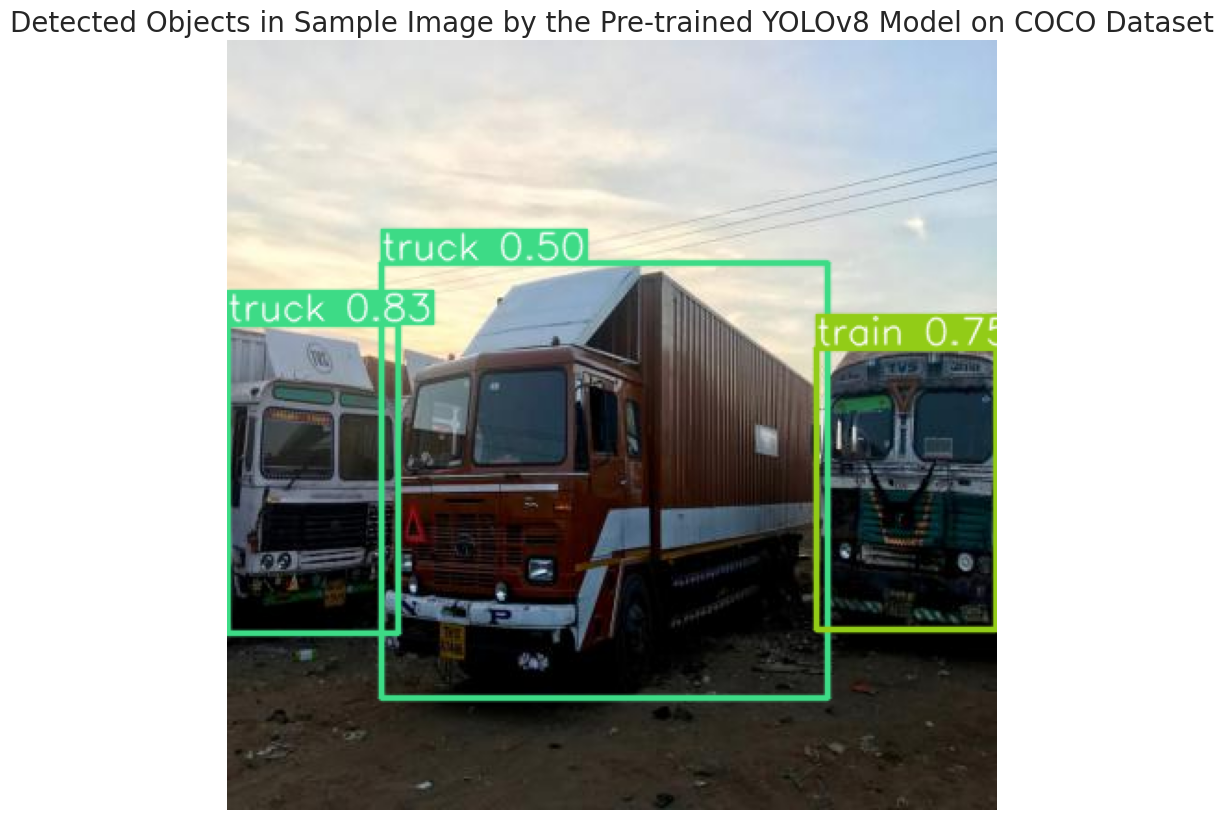

In [6]:
# Path to the image file
image_path = '/content/veichelecount/Transport Detection.v1i.yolov8/valid/images/00--395-_jpg.rf.b793ffe18c13b1e011e24674ebd32651.jpg'

# Perform inference on the provided image(s)
results = model.predict(source=image_path,
                        imgsz=640,  # Resize image to 640x640 (the size pf images the model was trained on)
                        conf=0.5)   # Confidence threshold: 50% (only detections above 50% confidence will be considered)

# Annotate and convert image to numpy array
sample_image = results[0].plot(line_width=2)

# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Display annotated image
plt.figure(figsize=(10,10))
plt.imshow(sample_image)
plt.title('Detected Objects in Sample Image by the Pre-trained YOLOv8 Model on COCO Dataset', fontsize=20)
plt.axis('off')
plt.show()

In [7]:
file_path='/content/veichelecount/Transport Detection.v1i.yolov8/valid/labels/00--395-_jpg.rf.b793ffe18c13b1e011e24674ebd32651.txt'
#As per data.yaml class 3 belongs to trucks and we have 3 trucks in the above image and one image is detected as train
#so we have to configure our yolo,pt
with open(file_path, "r") as file:
    content = file.read()
    print(content)

3 0.11057692307692307 0.5745192307692307 0.21033653846153846 0.4182692307692308
3 0.4831730769230769 0.5769230769230769 0.5685096153846154 0.5661057692307693
3 0.8762019230769231 0.578125 0.234375 0.4338942307692308


In [8]:
import os
import yaml
# Define the dataset_path
dataset_path = '/content/veichelecount/Transport Detection.v1i.yolov8'
# Set the path to the YAML file
yaml_file_path = os.path.join(dataset_path, 'data.yaml')

# Load and print the contents of the YAML file
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
    print(yaml.dump(yaml_content, default_flow_style=False))

# Set the path to the YAML file
yaml_file_path = os.path.join(dataset_path, 'data.yaml')

# Load and print the contents of the YAML file
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
    print(yaml.dump(yaml_content, default_flow_style=False))

names:
- bus
- car
- motorcycle
- truck
nc: 4
roboflow:
  license: CC BY 4.0
  project: transport-detection
  url: https://universe.roboflow.com/final-qualifying-work/transport-detection/dataset/1
  version: 1
  workspace: final-qualifying-work
test: ../test/images
train: ../train/images
val: ../valid/images

names:
- bus
- car
- motorcycle
- truck
nc: 4
roboflow:
  license: CC BY 4.0
  project: transport-detection
  url: https://universe.roboflow.com/final-qualifying-work/transport-detection/dataset/1
  version: 1
  workspace: final-qualifying-work
test: ../test/images
train: ../train/images
val: ../valid/images



In [9]:
from PIL import Image
# Set paths for training and validation image sets
train_images = os.path.join(dataset_path, 'train', 'images')
valid_images = os.path.join(dataset_path, 'valid', 'images')

# Initialize counters for the number of images
num_train_images = 0
num_valid_images = 0

# Initialize sets to hold the unique sizes of images
train_image_sizes = set()
valid_image_sizes = set()

# Check train images sizes and count
for filename in os.listdir(train_images):
    if filename.endswith('.jpg'):
        num_train_images += 1
        image_path = os.path.join(train_images, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)

# Check validation images sizes and count
for filename in os.listdir(valid_images):
    if filename.endswith('.jpg'):
        num_valid_images += 1
        image_path = os.path.join(valid_images, filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)

# Print the results
print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_valid_images}")

# Check if all images in training set have the same size
if len(train_image_sizes) == 1:
    print(f"All training images have the same size: {train_image_sizes.pop()}")
else:
    print("Training images have varying sizes.")

# Check if all images in validation set have the same size
if len(valid_image_sizes) == 1:
    print(f"All validation images have the same size: {valid_image_sizes.pop()}")
else:
    print("Validation images have varying sizes.")

Number of training images: 3219
Number of validation images: 315
All training images have the same size: (416, 416)
All validation images have the same size: (416, 416)


In [12]:
import wandb
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [14]:
wandb.init(project="major-project-college", name="Ailuri Narmada Reddy")
wandb.config.update({
    "model_name": "yolov8n",
    "epochs": 100,
    "imgsz": 640,
    "device": 1,
    "patience":50,             # Epochs to wait for no observable improvement for early stopping of training
    "batch":32,                # Number of images per batch
    "optimizer":'auto',        # Optimizer to use, choices=[SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto]
    "lr0":0.0001,              # Initial learning rate
    "lrf":0.1,                 # Final learning rate (lr0 * lrf)
    "dropout":0.1,             # Use dropout regularization
    "seed":0                # Random seed for reproducibility


})

wandb: Currently logged in as: avedareddy67 (major-project-college). Use `wandb login --relogin` to force relogin


In [22]:
results = model.train(
    data=yaml_file_path,     # Path to the dataset configuration file
    epochs=wandb.config["epochs"],              # Number of epochs to train for
    imgsz=wandb.config["imgsz"],              # Size of input images as integer
    device=wandb.config["device"],               # Device to run on, i.e. cuda device=0
    patience=wandb.config["patience"],             # Epochs to wait for no observable improvement for early stopping of training
    batch=wandb.config["batch"],                # Number of images per batch
    optimizer=wandb.config["optimizer"],        # Optimizer to use, choices=[SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto]
    lr0=wandb.config["lr0"],             # Initial learning rate
    lrf=wandb.config["lrf"],               # Final learning rate (lr0 * lrf)
    dropout=wandb.config["dropout"],           # Use dropout regularization
    seed=wandb.config["seed"]                  # Random seed for reproducibility
)

Ultralytics YOLOv8.1.12 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:1 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/veichelecount/Transport Detection.v1i.yolov8/data.yaml, epochs=100, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=1, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

100%|██████████| 755k/755k [00:00<00:00, 4.82MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/veichelecount/Transport Detection.v1i.yolov8/train/labels... 3219 images, 34 backgrounds, 0 corrupt: 100%|██████████| 3219/3219 [00:01<00:00, 1994.84it/s]


train: New cache created: /content/veichelecount/Transport Detection.v1i.yolov8/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/veichelecount/Transport Detection.v1i.yolov8/valid/labels... 315 images, 3 backgrounds, 0 corrupt: 100%|██████████| 315/315 [00:00<00:00, 993.36it/s] 

val: New cache created: /content/veichelecount/Transport Detection.v1i.yolov8/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.88G      2.107      2.621      1.941        134        640: 100%|██████████| 101/101 [01:10<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]

                   all        315       1890      0.411      0.407      0.366      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.96G      1.453       1.62      1.439        125        640: 100%|██████████| 101/101 [01:05<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        315       1890      0.552      0.516      0.549      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.22G      1.339      1.406      1.344        120        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.03s/it]

                   all        315       1890      0.654      0.515      0.592      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.43G      1.271      1.274        1.3        156        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        315       1890      0.755      0.641      0.716       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       4.7G      1.233      1.172      1.266        129        640: 100%|██████████| 101/101 [01:04<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        315       1890      0.806      0.646      0.728       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.67G      1.203      1.134      1.246        159        640: 100%|██████████| 101/101 [01:03<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

                   all        315       1890      0.792      0.694      0.767      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.27G      1.167      1.092      1.229        167        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        315       1890      0.724      0.662      0.726      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.04G      1.153      1.037      1.214        159        640: 100%|██████████| 101/101 [01:05<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]

                   all        315       1890       0.79      0.733      0.788      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.01G       1.12      1.004      1.198        153        640: 100%|██████████| 101/101 [01:04<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        315       1890      0.833      0.725      0.809      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.74G      1.103     0.9852       1.19        196        640: 100%|██████████| 101/101 [01:05<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        315       1890       0.81      0.727      0.801       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.88G      1.098     0.9537      1.185        165        640: 100%|██████████| 101/101 [01:06<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

                   all        315       1890      0.849      0.711      0.812      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.22G      1.082      0.936      1.176        138        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        315       1890       0.81      0.747      0.823      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.31G       1.06     0.9113      1.162        125        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.01s/it]

                   all        315       1890      0.827      0.739      0.819      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.93G       1.06     0.8969      1.158        236        640: 100%|██████████| 101/101 [01:03<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        315       1890      0.844      0.736      0.828      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.44G      1.039     0.8611      1.144        149        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        315       1890      0.865      0.755      0.848      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.69G      1.044     0.8692      1.148        104        640: 100%|██████████| 101/101 [01:04<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

                   all        315       1890      0.802      0.768      0.826      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.85G      1.031     0.8478      1.142        119        640: 100%|██████████| 101/101 [01:03<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]

                   all        315       1890      0.821      0.787      0.851      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.18G       1.02     0.8436      1.135        145        640: 100%|██████████| 101/101 [01:02<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        315       1890      0.871      0.767      0.838      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.66G     0.9979     0.8168      1.125        236        640: 100%|██████████| 101/101 [01:02<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        315       1890      0.832      0.758      0.837      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.98G      1.005     0.8212      1.127        205        640: 100%|██████████| 101/101 [01:02<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        315       1890       0.88      0.768      0.847      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.26G     0.9988     0.8087      1.127        143        640: 100%|██████████| 101/101 [01:03<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

                   all        315       1890      0.845      0.757      0.824      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.15G      0.988     0.7937      1.118        143        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        315       1890      0.842      0.777      0.843      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.89G     0.9902     0.7854      1.113        139        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

                   all        315       1890      0.871      0.745      0.841      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.24G     0.9785     0.7748      1.109        165        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        315       1890      0.885       0.77      0.848      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.04G     0.9735     0.7845       1.11        163        640: 100%|██████████| 101/101 [01:03<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.00s/it]

                   all        315       1890      0.856       0.78      0.844      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.98G     0.9695     0.7588      1.107        165        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        315       1890      0.843      0.793      0.837      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.08G     0.9599     0.7594      1.106        158        640: 100%|██████████| 101/101 [01:03<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        315       1890      0.904      0.761      0.852      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.74G     0.9585     0.7534      1.102        127        640: 100%|██████████| 101/101 [01:02<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        315       1890      0.888      0.747      0.836      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         5G     0.9537     0.7352      1.096        164        640: 100%|██████████| 101/101 [01:02<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

                   all        315       1890      0.865       0.76      0.842      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       5.2G     0.9487     0.7354      1.094        146        640: 100%|██████████| 101/101 [01:02<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        315       1890      0.859      0.794      0.851      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.93G     0.9432     0.7369      1.093        176        640: 100%|██████████| 101/101 [01:03<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        315       1890      0.856      0.778      0.845      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.43G     0.9367      0.715      1.086        236        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        315       1890       0.84      0.777      0.849      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.94G     0.9339     0.7198      1.088        121        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all        315       1890      0.869      0.787      0.858      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.25G     0.9409     0.7109       1.09        151        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        315       1890      0.882      0.767      0.852      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.25G     0.9308     0.7029      1.083        156        640: 100%|██████████| 101/101 [01:04<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        315       1890      0.843      0.776       0.84      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.77G     0.9217     0.6994      1.078        216        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        315       1890      0.867      0.791      0.861      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.25G     0.9263     0.6928      1.079        190        640: 100%|██████████| 101/101 [01:04<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        315       1890      0.882      0.771      0.856      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       5.2G     0.9135      0.686      1.072        160        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        315       1890      0.872      0.789      0.861      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.73G     0.9031     0.6781      1.068        188        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

                   all        315       1890      0.873      0.787      0.853      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.74G     0.9038     0.6767      1.071        139        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]

                   all        315       1890       0.87      0.774       0.85      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.99G     0.9067     0.6814      1.074        128        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]

                   all        315       1890      0.883      0.764       0.85      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.17G     0.9035     0.6741      1.074        173        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        315       1890       0.87       0.81      0.859      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       5.2G     0.8921     0.6558       1.06        228        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.02it/s]

                   all        315       1890      0.879      0.782      0.848      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.86G     0.8883     0.6555      1.063        199        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        315       1890      0.885      0.797      0.862       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.02G        0.9     0.6571      1.064        135        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        315       1890      0.897      0.783      0.856      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       4.5G     0.8807     0.6433      1.057        179        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        315       1890      0.893      0.786      0.856      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.26G     0.8814     0.6504      1.056        175        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        315       1890      0.908      0.757      0.856      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.15G      0.868     0.6368      1.053        230        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]

                   all        315       1890      0.867      0.793      0.859      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.23G       0.88     0.6445      1.057        186        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all        315       1890      0.883      0.782      0.862      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.68G     0.8654     0.6272      1.046        145        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        315       1890      0.886      0.782      0.853      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.83G     0.8651     0.6305      1.051        149        640: 100%|██████████| 101/101 [01:02<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.01s/it]

                   all        315       1890       0.89      0.789      0.865       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.93G     0.8559     0.6224      1.049         90        640: 100%|██████████| 101/101 [01:03<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all        315       1890      0.891       0.77      0.857      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.97G     0.8736     0.6355      1.052        170        640: 100%|██████████| 101/101 [01:03<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        315       1890      0.879      0.798      0.848      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.24G     0.8673      0.622      1.048        153        640: 100%|██████████| 101/101 [01:03<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.01s/it]

                   all        315       1890      0.901      0.784      0.853       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       5.2G     0.8582     0.6214      1.042        214        640: 100%|██████████| 101/101 [01:03<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

                   all        315       1890      0.883      0.769      0.854      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.68G     0.8619     0.6193      1.048        156        640: 100%|██████████| 101/101 [01:03<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]

                   all        315       1890      0.882      0.787      0.861      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.75G     0.8586     0.6213      1.046        113        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

                   all        315       1890      0.902      0.777      0.856      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.98G     0.8439     0.6039      1.039        110        640: 100%|██████████| 101/101 [01:04<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

                   all        315       1890      0.902      0.797      0.862      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.87G     0.8407     0.6021      1.038        107        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        315       1890      0.874      0.815      0.857      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.66G     0.8412     0.5971      1.036        218        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        315       1890      0.891      0.804      0.867      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.69G     0.8446     0.6063       1.04        295        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]

                   all        315       1890       0.88      0.806      0.859      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.53G     0.8399     0.5963      1.035        173        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.01s/it]

                   all        315       1890      0.895      0.794      0.861      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.78G      0.837     0.5918      1.037        196        640: 100%|██████████| 101/101 [01:05<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        315       1890      0.874       0.79      0.856      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.54G     0.8336      0.591      1.034        156        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        315       1890      0.855      0.823      0.863      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.17G     0.8299     0.5858       1.03        219        640: 100%|██████████| 101/101 [01:04<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]

                   all        315       1890       0.89      0.803      0.859      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.18G     0.8305     0.5825      1.029        172        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        315       1890      0.897      0.789      0.858       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.97G      0.832     0.5859      1.032        158        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        315       1890      0.868      0.816      0.858      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.94G     0.8266     0.5788      1.028        151        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        315       1890      0.909      0.778      0.857      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.05G     0.8234     0.5734      1.022        158        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        315       1890      0.877      0.805      0.859      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.98G     0.8148     0.5675      1.022        140        640: 100%|██████████| 101/101 [01:03<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.02s/it]

                   all        315       1890      0.883      0.794      0.855      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.96G     0.8154     0.5687       1.02        175        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        315       1890      0.872      0.799      0.856      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.05G     0.8113     0.5617      1.019        132        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        315       1890      0.908      0.767      0.855      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.93G     0.8151     0.5648      1.022        215        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        315       1890      0.908      0.784      0.852      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.21G     0.8144     0.5628      1.019        253        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        315       1890      0.889      0.801      0.858      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.01G     0.8021     0.5567      1.016        197        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        315       1890      0.903       0.78       0.85      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.09G     0.8126     0.5624      1.017        193        640: 100%|██████████| 101/101 [01:05<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        315       1890      0.901      0.793      0.858      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.92G     0.7959     0.5449      1.012        230        640: 100%|██████████| 101/101 [01:05<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

                   all        315       1890      0.918      0.771      0.858      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.19G     0.7999     0.5499       1.01        189        640: 100%|██████████| 101/101 [01:06<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]

                   all        315       1890      0.898      0.802      0.865      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.02G     0.8034     0.5464      1.014        201        640: 100%|██████████| 101/101 [01:05<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]

                   all        315       1890      0.913      0.774      0.853      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.97G     0.8015     0.5448      1.013        242        640: 100%|██████████| 101/101 [01:04<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]

                   all        315       1890      0.869      0.809      0.855      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.34G     0.7959     0.5478      1.013        128        640: 100%|██████████| 101/101 [01:05<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]

                   all        315       1890        0.9      0.794      0.858      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.72G     0.7898     0.5367       1.01        146        640: 100%|██████████| 101/101 [01:05<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        315       1890      0.908      0.801      0.861      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.98G     0.7879     0.5367      1.008        168        640: 100%|██████████| 101/101 [01:05<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        315       1890      0.902      0.788      0.856      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.29G     0.7897     0.5368      1.007        160        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

                   all        315       1890      0.856      0.808      0.853      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.29G       0.79     0.5434      1.009        247        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]

                   all        315       1890      0.906      0.785      0.859      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       4.9G      0.787     0.5363      1.009        194        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]

                   all        315       1890      0.896      0.802      0.861      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.22G     0.7801     0.5333      1.007        118        640: 100%|██████████| 101/101 [01:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]

                   all        315       1890       0.88      0.816      0.858      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       5.2G     0.7829      0.527      1.004        301        640: 100%|██████████| 101/101 [01:05<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        315       1890      0.873      0.819      0.856       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.02G       0.78     0.5303          1        141        640: 100%|██████████| 101/101 [01:05<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.02it/s]

                   all        315       1890      0.875      0.816      0.858       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.74G     0.7721     0.5253      1.001        132        640: 100%|██████████| 101/101 [01:05<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

                   all        315       1890      0.886      0.797      0.859      0.636


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.19G     0.7335     0.4418     0.9684         80        640: 100%|██████████| 101/101 [01:02<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

                   all        315       1890      0.898      0.806      0.861      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.68G     0.7161     0.4268     0.9595        161        640: 100%|██████████| 101/101 [00:59<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

                   all        315       1890      0.898        0.8      0.865      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.67G     0.7161     0.4223     0.9631        123        640: 100%|██████████| 101/101 [00:58<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        315       1890      0.883      0.812      0.863       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.45G      0.712     0.4197     0.9608        117        640: 100%|██████████| 101/101 [00:59<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

                   all        315       1890      0.913       0.78      0.859      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.62G     0.7081     0.4141     0.9582         92        640: 100%|██████████| 101/101 [00:58<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

                   all        315       1890      0.909      0.785      0.865      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.72G      0.705     0.4103     0.9571        100        640: 100%|██████████| 101/101 [00:58<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        315       1890      0.902      0.787      0.861      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.62G     0.6973     0.4087     0.9537        112        640: 100%|██████████| 101/101 [00:58<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        315       1890      0.908      0.794      0.864      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.68G     0.6997     0.4082     0.9539        133        640: 100%|██████████| 101/101 [00:57<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        315       1890      0.902      0.788      0.858      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.63G     0.6915     0.4051     0.9495        108        640: 100%|██████████| 101/101 [00:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        315       1890      0.905      0.789       0.86      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.65G     0.6939     0.4051     0.9509        165        640: 100%|██████████| 101/101 [00:58<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]

                   all        315       1890      0.895      0.796      0.862      0.644



100 epochs completed in 1.913 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.12 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:1 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.23s/it]


                   all        315       1890      0.908      0.795      0.864       0.65
                   bus        315        103       0.94      0.755      0.831      0.651
                   car        315       1239      0.928      0.884      0.933      0.741
            motorcycle        315        379       0.87      0.813      0.877      0.564
                 truck        315        169      0.896      0.728      0.815      0.645
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train


In [35]:
post_training_files_path = '/content/runs/detect/train'

In [36]:
def plot_learning_curve(df, train_loss_col, val_loss_col, title):
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='#141140', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='orangered', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

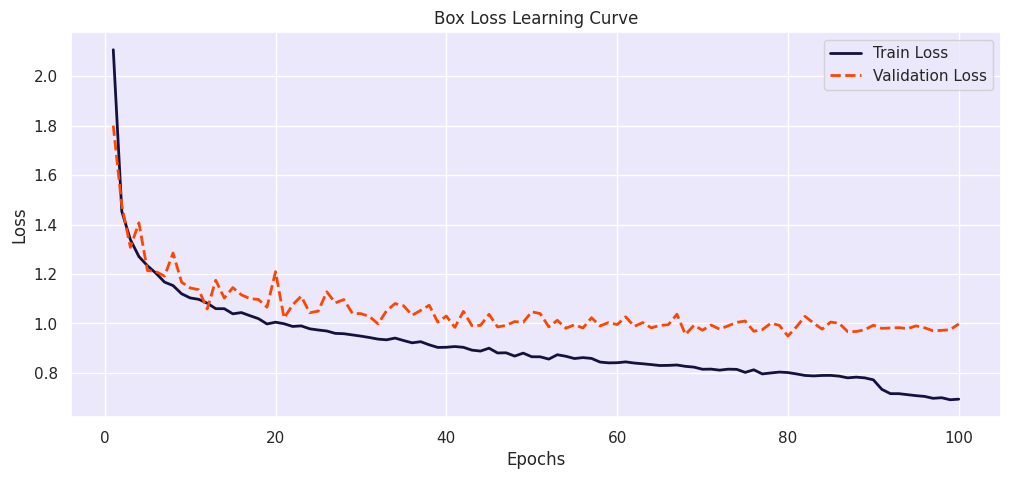

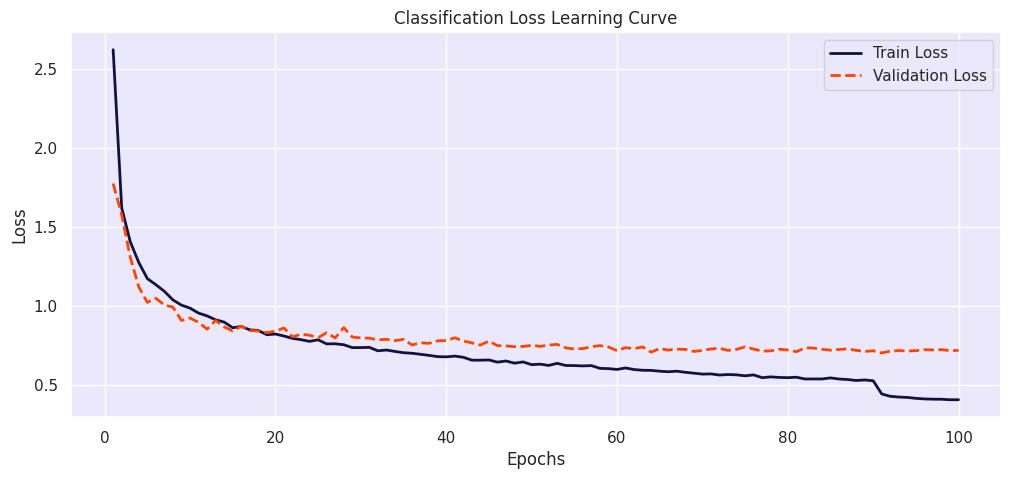

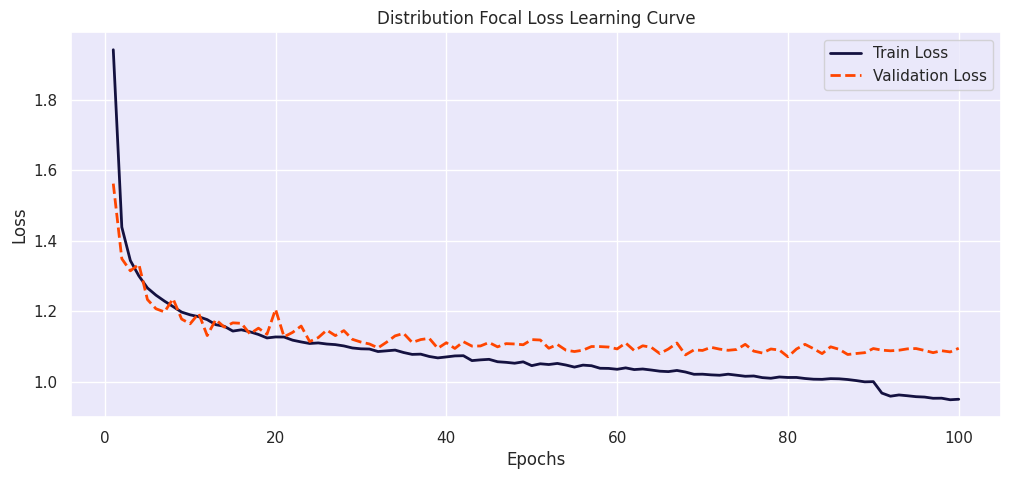

In [34]:
# Create the full file path for 'results.csv' using the directory path and file name
results_csv_path = os.path.join(post_training_files_path, 'results.csv')

# Load the CSV file from the constructed path into a pandas DataFrame
df = pd.read_csv(results_csv_path)

# Remove any leading whitespace from the column names
df.columns = df.columns.str.strip()

# Plot the learning curves for each loss
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')

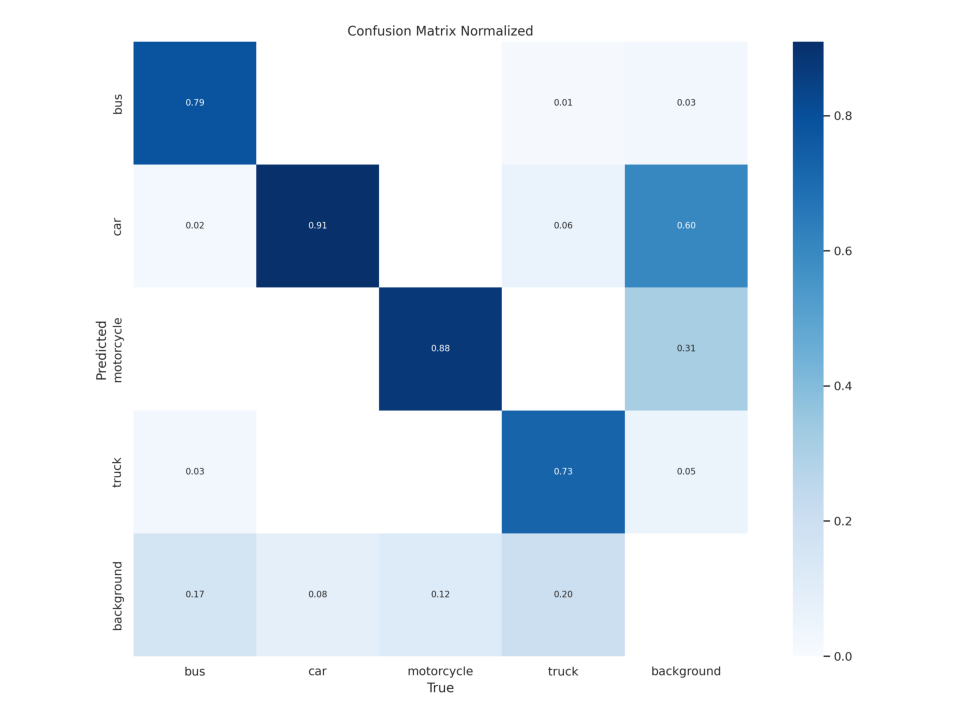

In [37]:
# Construct the path to the normalized confusion matrix image
confusion_matrix_path = os.path.join(post_training_files_path, 'confusion_matrix_normalized.png')

# Read the image using cv2
cm_img = cv2.imread(confusion_matrix_path)

# Convert the image from BGR to RGB color space for accurate color representation with matplotlib
cm_img = cv2.cvtColor(cm_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10), dpi=120)
plt.imshow(cm_img)
plt.axis('off')
plt.show()

In [38]:
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Validate the best model using the validation set with default parameters
metrics = best_model.val(split='val')

Ultralytics YOLOv8.1.12 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/veichelecount/Transport Detection.v1i.yolov8/valid/labels.cache... 315 images, 3 backgrounds, 0 corrupt: 100%|██████████| 315/315 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:11<00:00,  1.73it/s]


                   all        315       1890      0.909      0.794      0.864      0.649
                   bus        315        103       0.94      0.754      0.831       0.65
                   car        315       1239      0.928      0.884      0.933      0.742
            motorcycle        315        379      0.872      0.812      0.878      0.565
                 truck        315        169      0.896      0.728      0.815      0.641
Speed: 1.1ms preprocess, 6.0ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/val


In [39]:
# Convert the dictionary to a pandas DataFrame and use the keys as the index
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

# Display the DataFrame
metrics_df.round(3)

Metric Value
metrics/precision(B)         0.909
metrics/recall(B)            0.794
metrics/mAP50(B)             0.864
metrics/mAP50-95(B)          0.649
fitness                      0.671


image 1/1 /content/veichelecount/Transport Detection.v1i.yolov8/valid/images/d50d7d05ebcb572c_jpg.rf.8c77f7c24635a0ecd4b82558c31a2e75.jpg: 640x640 (no detections), 15.4ms
Speed: 7.8ms preprocess, 15.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/veichelecount/Transport Detection.v1i.yolov8/valid/images/00--393-_jpg.rf.e161c33edab978cad0723f9f6a58c47e.jpg: 640x640 1 truck, 17.9ms
Speed: 3.5ms preprocess, 17.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/veichelecount/Transport Detection.v1i.yolov8/valid/images/11--80-_png.rf.344a6e5414f1acfec7e9b228d12f49e5.jpg: 640x640 2 cars, 1 truck, 17.7ms
Speed: 3.6ms preprocess, 17.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/veichelecount/Transport Detection.v1i.yolov8/valid/images/ce14ea02e2b95819_jpg.rf.0429ccbc8d33f88613229dd77be990fb.jpg: 640x640 3 cars, 9.5ms
Speed: 2.6ms preprocess, 9.5ms inference, 1.4ms postproc

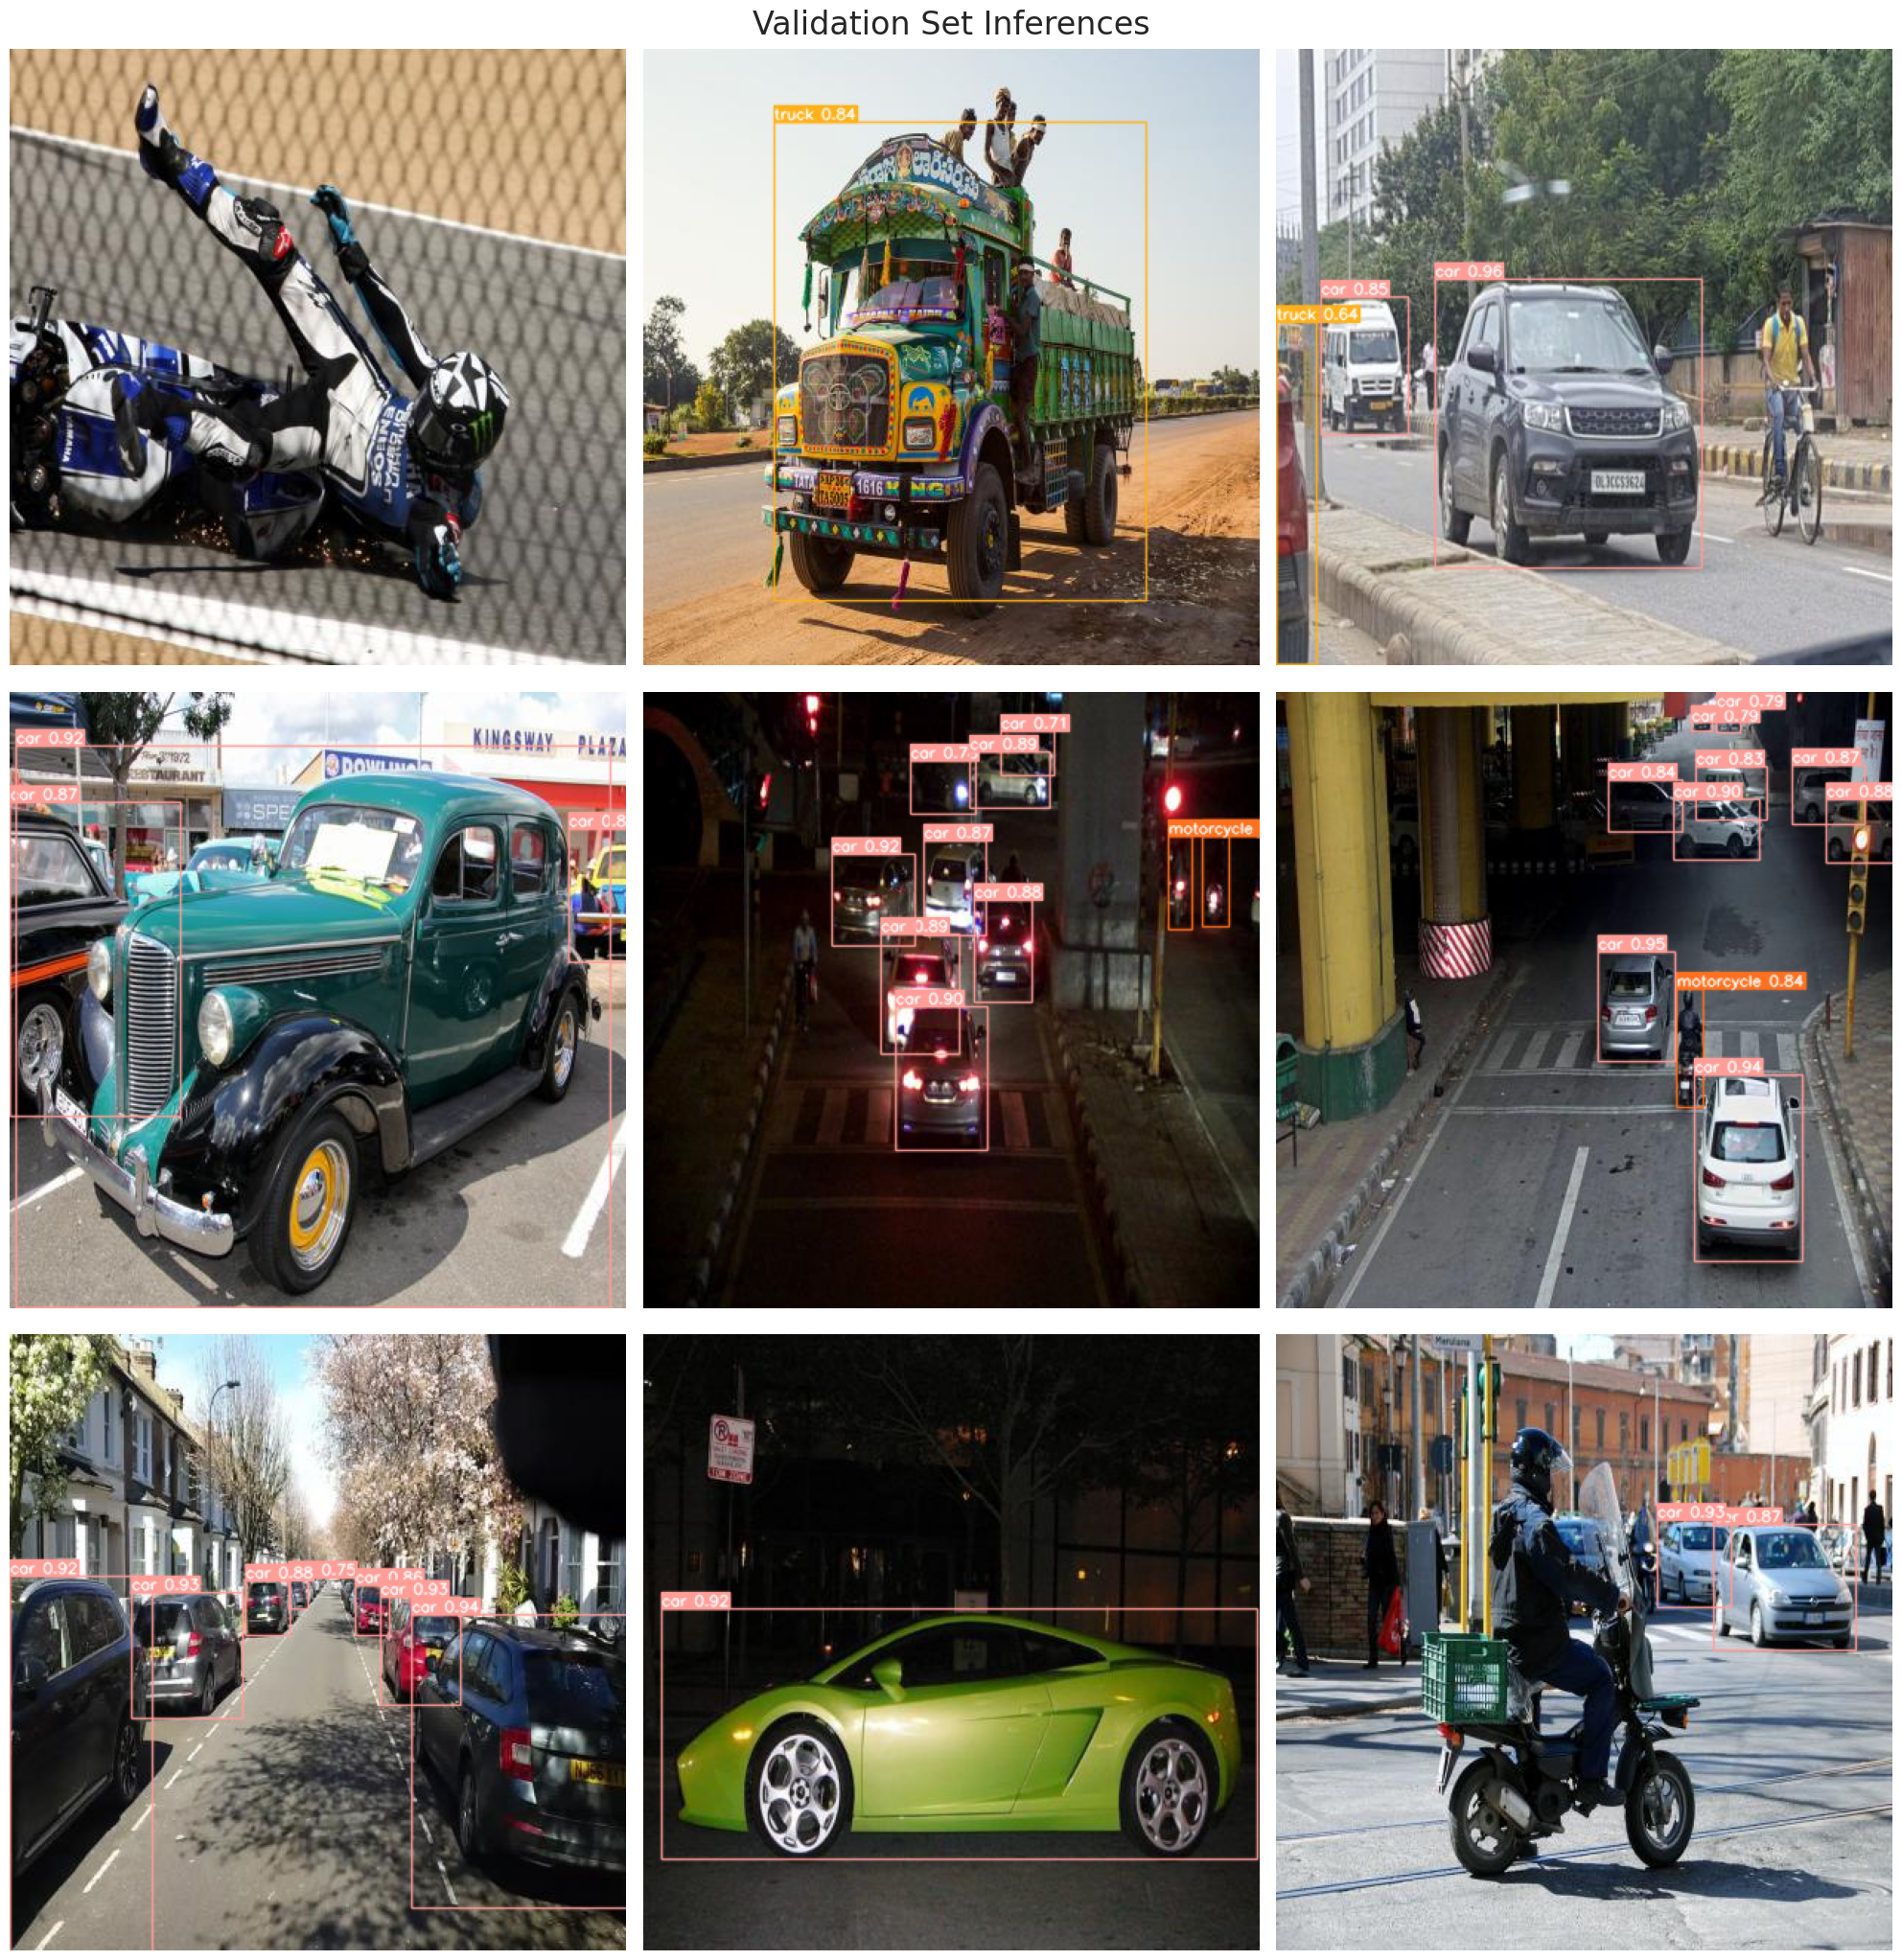

In [40]:
# Define the path to the validation images
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

# List all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Select 9 images at equal intervals
num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, num_images // 9)]

# Initialize the subplot
fig, axes = plt.subplots(3, 3, figsize=(20, 21))
fig.suptitle('Validation Set Inferences', fontsize=24)

# Perform inference on each selected image and display it
for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(valid_images_path, selected_images[i])
    results = best_model.predict(source=image_path, imgsz=640, conf=0.5)
    annotated_image = results[0].plot(line_width=1)
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    ax.imshow(annotated_image_rgb)
    ax.axis('off')

plt.tight_layout()
plt.show()


image 1/1 /content/veichelecount/Transport Detection.v1i.yolov8/valid/images/00--395-_jpg.rf.b793ffe18c13b1e011e24674ebd32651.jpg: 640x640 3 trucks, 22.5ms
Speed: 3.2ms preprocess, 22.5ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)


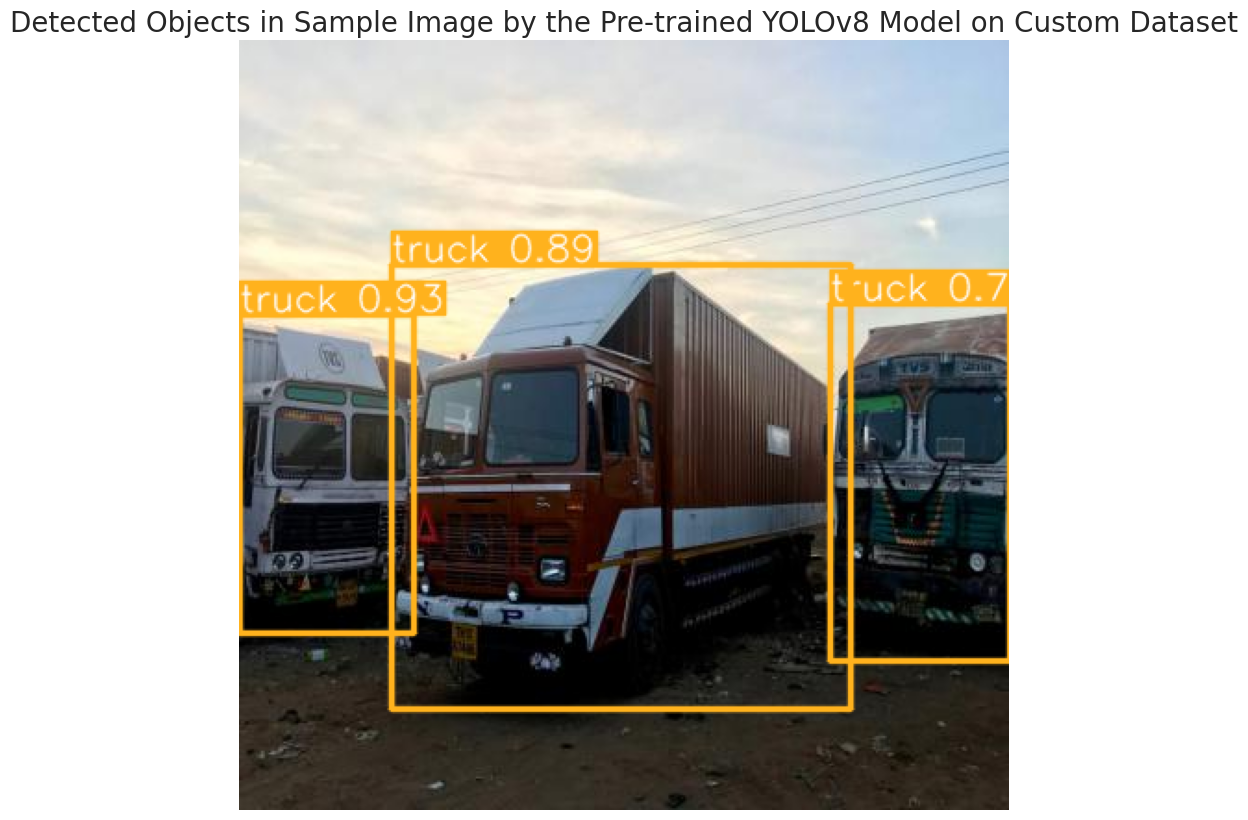

In [41]:
# Path to the image file
image_path = '/content/veichelecount/Transport Detection.v1i.yolov8/valid/images/00--395-_jpg.rf.b793ffe18c13b1e011e24674ebd32651.jpg'

# Perform inference on the provided image(s)
results = best_model.predict(source=image_path,
                        imgsz=640,  # Resize image to 640x640 (the size pf images the model was trained on)
                        conf=0.5)   # Confidence threshold: 50% (only detections above 50% confidence will be considered)

# Annotate and convert image to numpy array
sample_image = results[0].plot(line_width=2)

# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Display annotated image
plt.figure(figsize=(10,10))
plt.imshow(sample_image)
plt.title('Detected Objects in Sample Image by the Pre-trained YOLOv8 Model on Custom Dataset', fontsize=20)
plt.axis('off')
plt.show()

In [42]:
best_model.export(format='onnx')

Ultralytics YOLOv8.1.12 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (6.0 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 43.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.3s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 11.2s, saved as '/content/runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (13.2s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640 data=/

'/content/runs/detect/train/weights/best.onnx'